# PRACTICA 2 - ARITMETICA DE PIXEL

In [59]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

(178, 284, 3)
(178, 284, 3)


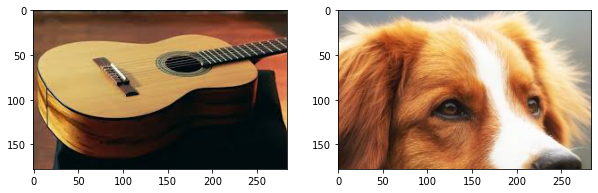

In [73]:
img_1 = imageio.imread('guitarra.png')/255
img_2 = imageio.imread('ejemplo.png')[50:228,150:434,:]/255


#[50:228,150:434,:]

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

print(img_1.shape)
print(img_2.shape)

# Aritmetica de Pixel

Implementar las siguientes operaciones aritmeticas:

1. Suma y diferencia clampeada en RGB 
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

### SUMA Y DIFERENCIA CLAMPEADA (RGB)

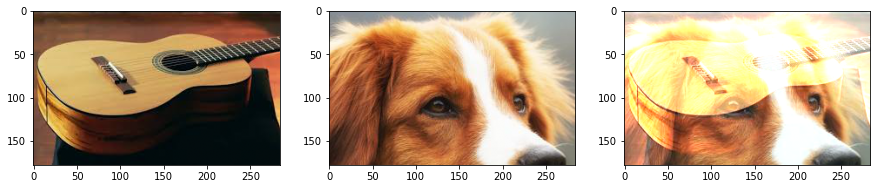

In [74]:
img_3 = img_1 + img_2
img_3 = np.clip(img_3, 0 , 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

### SUMA Y DIFERENCIA PROMEDIADA (RGB)

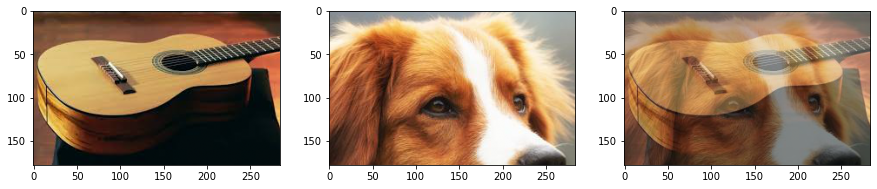

In [65]:
img_3 = (img_1 + img_2)/2
img_3 = np.clip(img_3, 0 , 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

### SUMA Y DIFERENCIA (YIQ)

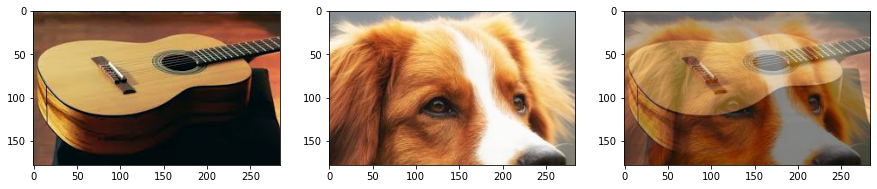

In [67]:
img_1_yiq = rgb2yiq(img_1)
img_1_y = img_1_yiq[:,:,0]
img_1_i = img_1_yiq[:,:,1]
img_1_q = img_1_yiq[:,:,2]

img_2_yiq = rgb2yiq(img_2)
img_2_y = img_2_yiq[:,:,0]
img_2_i = img_2_yiq[:,:,1]
img_2_q = img_2_yiq[:,:,2]

#/////////////////////////
#Suma clampeada/promediada
#img_3_yiq_y = np.clip(img_1_y + img_2_y,0,1)
img_3_yiq_y = (img_1_y + img_2_y)/2
#////////////////////////
#Suma Interpolada
img_3_yiq_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y)
img_3_yiq_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)
#////////////////////////

img_3_yiq[:,:,0] = img_3_yiq_y
img_3_yiq[:,:,1] = img_3_yiq_i
img_3_yiq[:,:,2] = img_3_yiq_q

img_3_rgb = yiq2rgb(img_3_yiq)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(np.clip(img_3_rgb,0,1))


### IF-LIGHTER / IF-DARKER

In [68]:
def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
  
    mask = img_1_y > img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y >= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

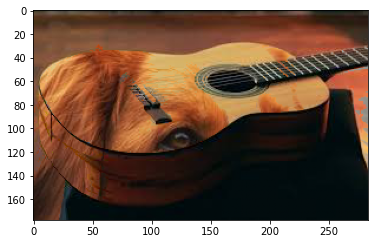

In [70]:
img_3 = if_darker(img_1,img_2)
plt.imshow(img_3)